In [ ]:
!pip install opencv-python

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer-images-for-site2-1.png to customer-images-for-site2-1.png


In [ ]:
import numpy as np
import io

# Get the uploaded file name
file_name = next(iter(uploaded))
image = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), cv2.IMREAD_COLOR)

In [ ]:
import numpy as np
import io

In [ ]:
file_name = next(iter(uploaded))
image = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), cv2.IMREAD_COLOR)

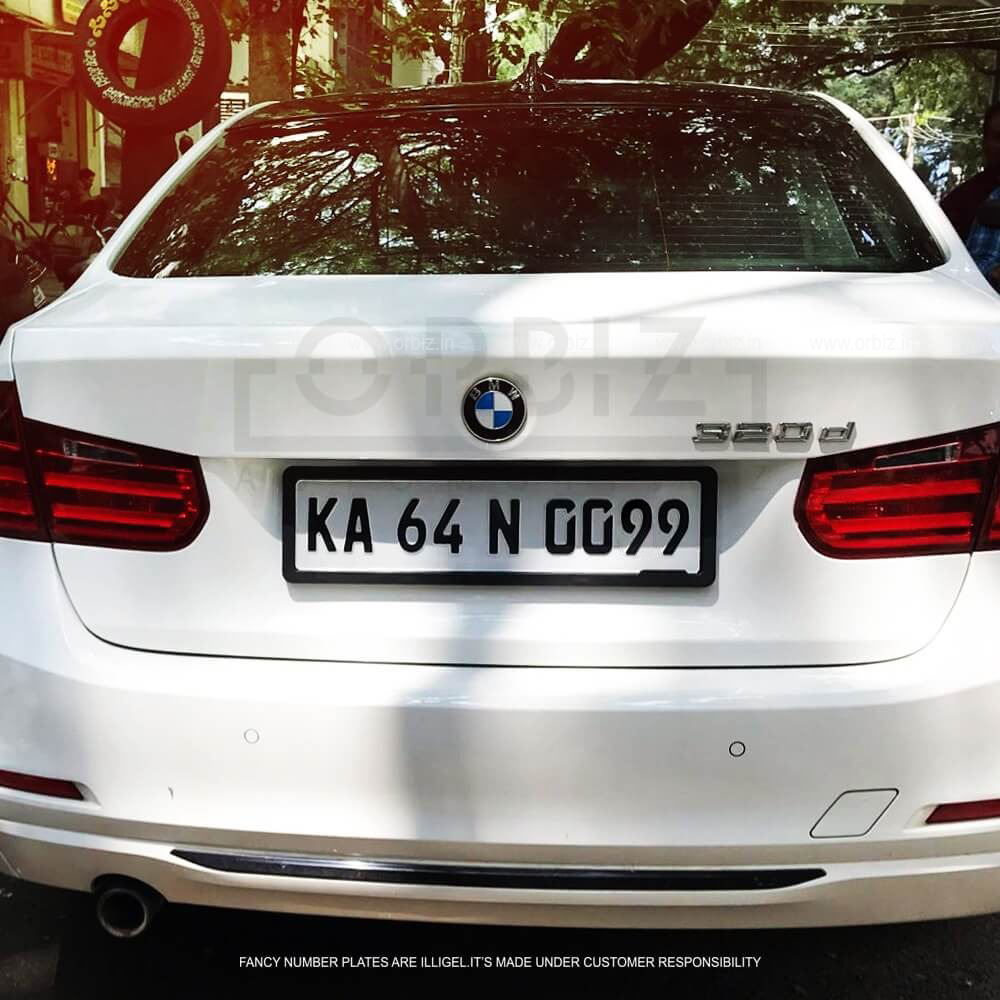

In [ ]:
cv2_imshow(image)

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
from google.colab.patches import cv2_imshow

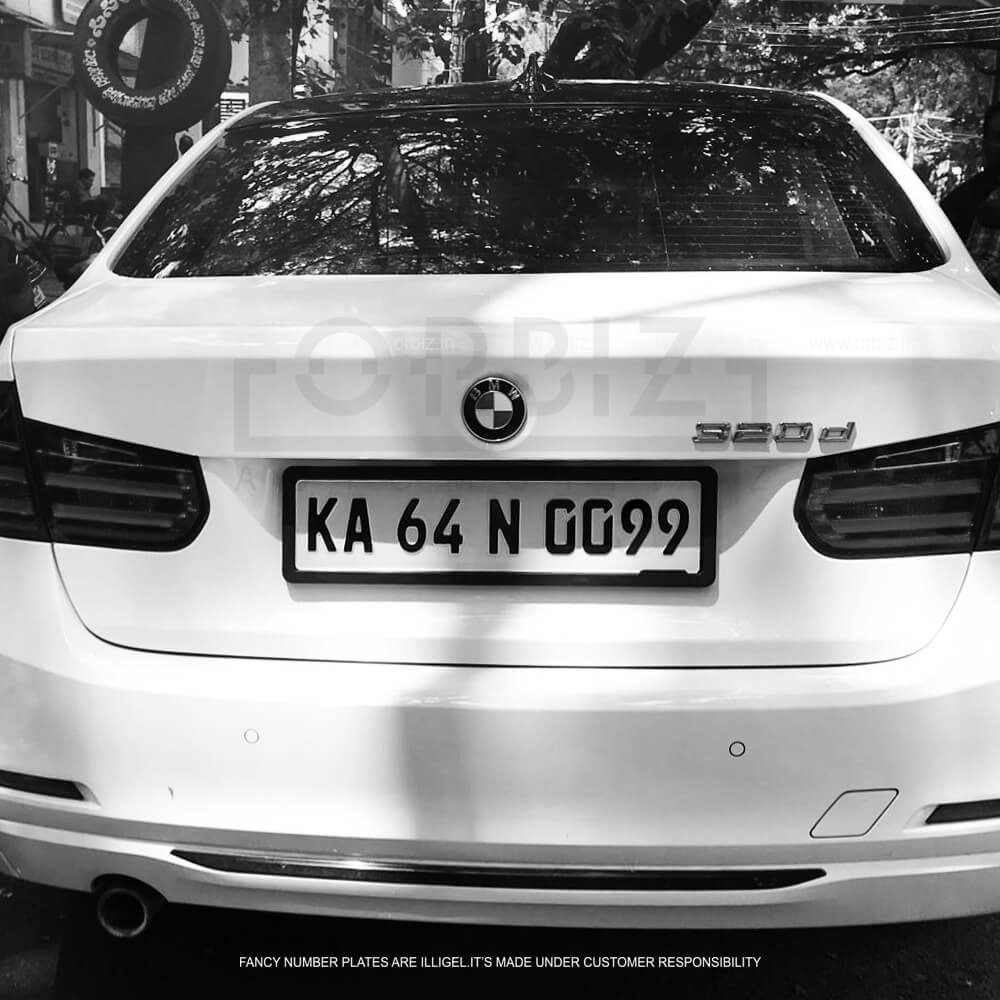

In [ ]:
cv2_imshow(gray)

In [ ]:


filtered = cv2.bilateralFilter(gray, 11, 17, 17)

In [ ]:
edges = cv2.Canny(filtered, 30, 200)

In [ ]:
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
plate = None

In [ ]:
for c in contours:
    approx = cv2.approxPolyDP(c, 0.02 * cv2.arcLength(c, True), True)
    if len(approx) == 4:  # Looks like a rectangle
        plate = approx
        break

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
if plate is not None:
    x, y, w, h = cv2.boundingRect(plate)
    number_plate = gray[y:y+h, x:x+w]

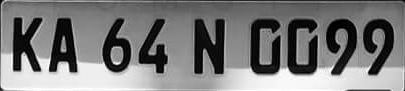

In [ ]:
cv2_imshow(number_plate)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

array([[[ 69, 135, 183],
        [ 84, 149, 194],
        [ 93, 162, 202],
        ...,
        [ 29,  41,  51],
        [ 29,  39,  49],
        [ 26,  36,  46]],

       [[ 37, 103, 151],
        [ 50, 117, 162],
        [ 64, 134, 174],
        ...,
        [ 29,  41,  51],
        [ 27,  39,  49],
        [ 25,  37,  47]],

       [[  0,  67, 117],
        [  9,  75, 126],
        [ 22,  92, 139],
        ...,
        [ 28,  40,  50],
        [ 26,  38,  48],
        [ 23,  35,  45]],

       ...,

       [[ 23,  25,  26],
        [ 23,  25,  26],
        [ 23,  25,  26],
        ...,
        [ 29,  31,  32],
        [ 30,  32,  33],
        [ 32,  34,  35]],

       [[ 23,  25,  26],
        [ 23,  25,  26],
        [ 23,  25,  26],
        ...,
        [ 29,  31,  32],
        [ 31,  33,  34],
        [ 33,  35,  36]],

       [[ 23,  25,  26],
        [ 23,  25,  26],
        [ 23,  25,  26],
        ...,
        [ 29,  31,  32],
        [ 31,  33,  34],
        [ 33,  35,  36]]], dtype=uint8)
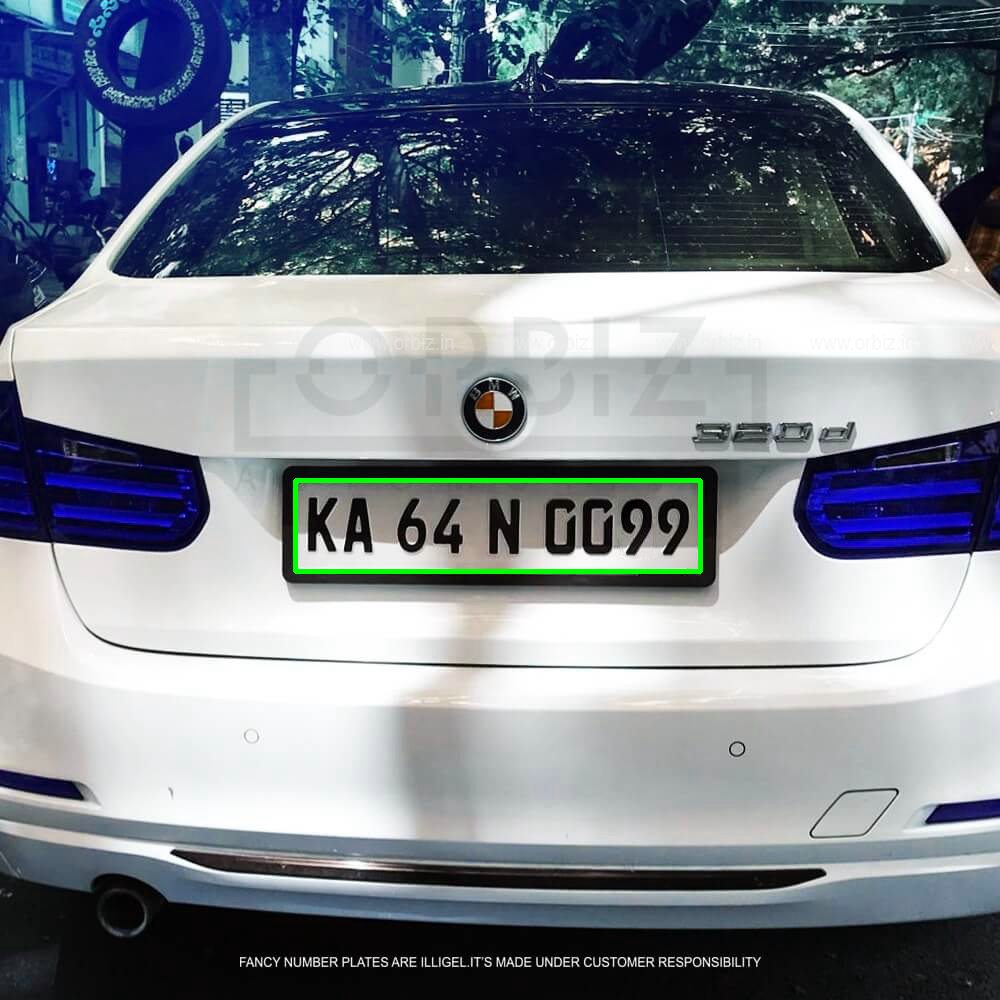

In [ ]:


cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)

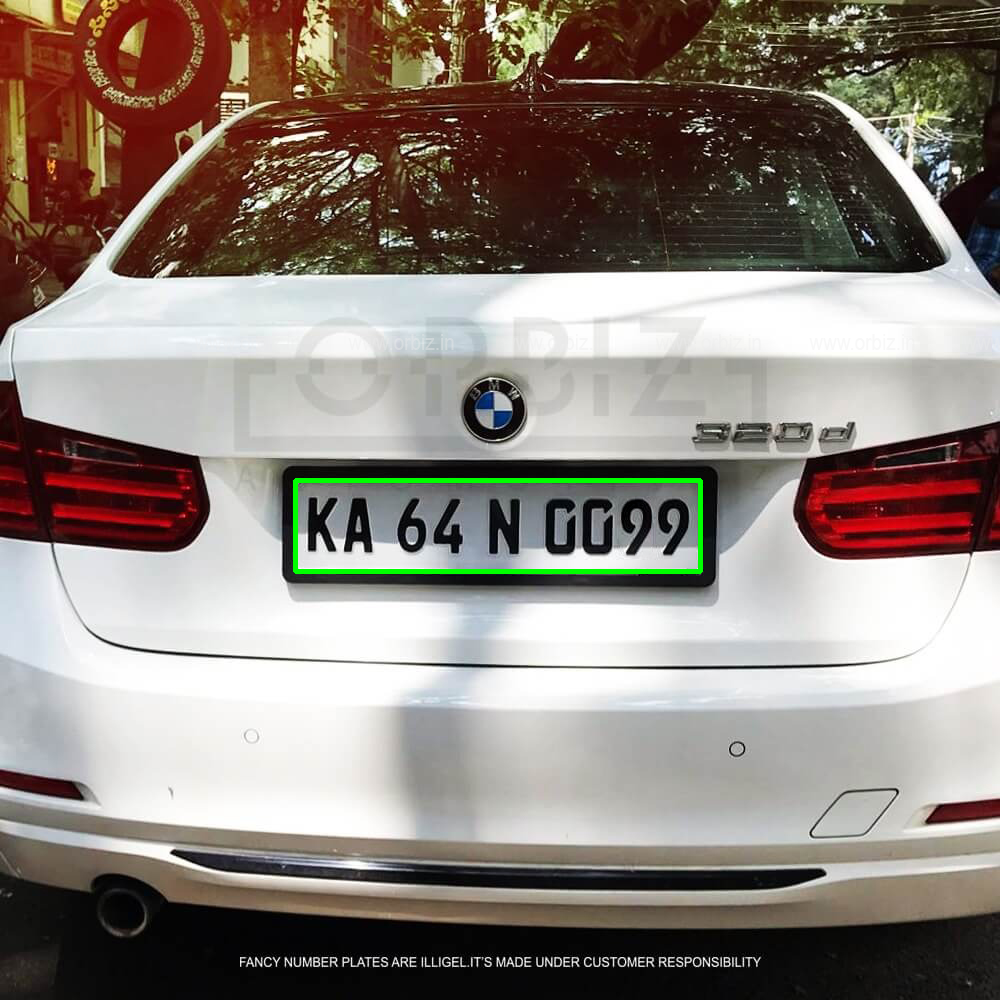

In [ ]:
cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()